In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

📌 상관계수
                 visitors_num     lag_1     lag_3     lag_6  rolling_mean_3  \
visitors_num         1.000000  0.967700  0.918118  0.850636        0.956618   
lag_1                0.967700  1.000000  0.937943  0.871940        0.980810   
lag_3                0.918118  0.937943  1.000000  0.921772        0.983157   
lag_6                0.850636  0.871940  0.921772  1.000000        0.909836   
rolling_mean_3       0.956618  0.980810  0.983157  0.909836        1.000000   
rolling_mean_6       0.933400  0.956325  0.982208  0.961488        0.985291   
rolling_mean_12      0.884432  0.903962  0.942258  0.971734        0.938009   

                 rolling_mean_6  rolling_mean_12  
visitors_num           0.933400         0.884432  
lag_1                  0.956325         0.903962  
lag_3                  0.982208         0.942258  
lag_6                  0.961488         0.971734  
rolling_mean_3         0.985291         0.938009  
rolling_mean_6         1.000000         0.971999  
rol

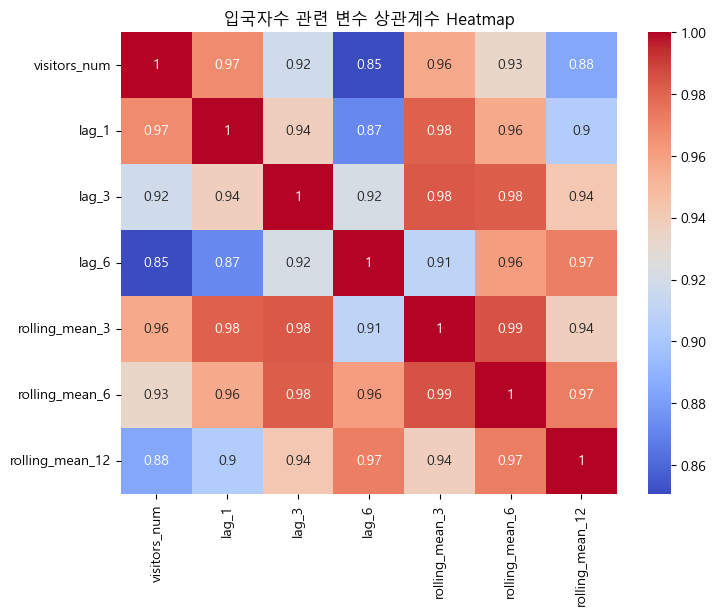

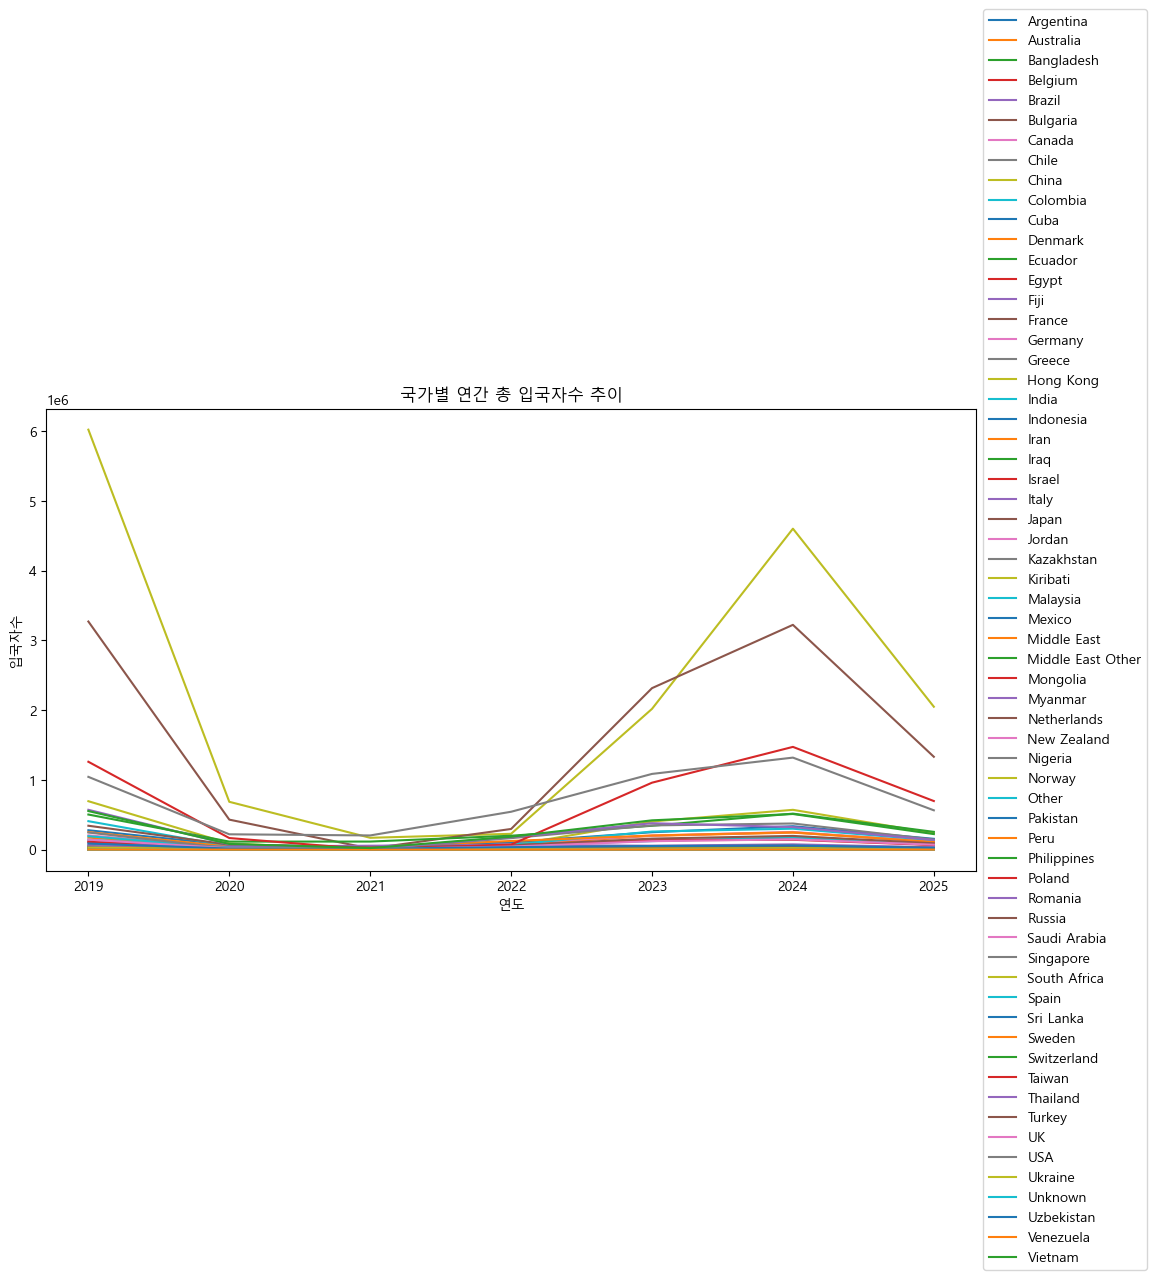

In [6]:

# ✅ 입국자수 데이터 상관분석 & 그룹화 시각화 샘플

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ 데이터 로드
df = pd.read_csv('foreign_visitors_pipeline_ready.csv')

# 2️⃣ 숫자형 상관분석
corr = df[['visitors_num', 'lag_1', 'lag_3', 'lag_6',
           'rolling_mean_3', 'rolling_mean_6', 'rolling_mean_12']].corr()
print('📌 상관계수')
print(corr)

# 3️⃣ 히트맵
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('입국자수 관련 변수 상관계수 Heatmap')
plt.show()

# 4️⃣ 국가별 연간 그룹화
grouped = df.groupby(['year', 'country_en'])['visitors_num'].sum().reset_index()

plt.figure(figsize=(12,6))
for country in grouped['country_en'].unique():
    temp = grouped[grouped['country_en'] == country]
    plt.plot(temp['year'], temp['visitors_num'], label=country)

plt.title('국가별 연간 총 입국자수 추이')
plt.xlabel('연도')
plt.ylabel('입국자수')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
